## 콘크리트 데이터셋 도전

- [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)의 [
Concrete Compressive Strength Data Set](https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength)에서 `Concrete_Data.xls`를 다운로드


### 1. 데이터 탐색

#### 1.1 데이터적재

In [24]:
import pandas as pd

In [25]:
# colab 에서 xlrd 관련 에러 생겼을 경우 아래 설치
# pip install --upgrade xlrd

In [26]:
concrete = pd.read_excel("./datasets/Concrete_Data.xls")

#### 1.2 데이터 훑어보기

In [27]:
concrete.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


* **Cement** (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
* **Blast Furnace Slag** (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
* **Fly Ash** (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
* **Water** (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
* **Superplasticizer** (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
* **Coarse Aggregate** (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
* **Fine Aggregate** (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
* **Age** -- quantitative -- Day (1~365) -- Input Variable
* **Concrete compressive strength** -- quantitative -- MPa -- Output Variable 

---

#### 1.3 컬럼명 변경

* columns를 단순한 이름으로 변경
* 예 : ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']

In [28]:
concrete.columns = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']
concrete

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


* 앞의 2행 확인하기

In [29]:
concrete.head(2)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366


* 뒤의 2행 확인하기

In [30]:
concrete.tail(2)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.401235


#### 1.4 통계값 살펴보기

In [31]:
concrete.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


#### 1.5 데이터의 요약 정보 확인하기(데이터 타입, 누락 정보 등)

In [32]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


#### 1.6 누락 정보 확인하기

In [33]:
concrete.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

#### 1.7 각 특성의 평균값 확인하기

In [34]:
concrete.mean()

cement          281.165631
slag             73.895485
ash              54.187136
water           181.566359
superplastic      6.203112
coarseagg       972.918592
fineagg         773.578883
age              45.662136
strength         35.817836
dtype: float64

#### 1.8 slag 특성의 데이터 분포 확인하기

<AxesSubplot:>

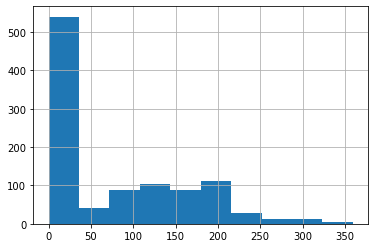

In [35]:
concrete['slag'].hist()

* (Note) boxplot으로 보다 편리하게 이상치(outlier) 확인하기

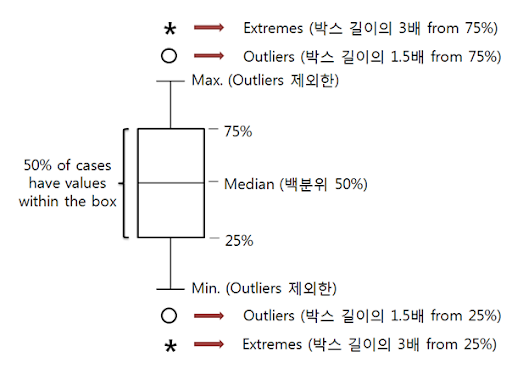

In [36]:
from IPython.display import Image
Image(filename='boxplot.png', width=400)

* boxplot() 함수는 이상치를 감지하고 수염 부분에 이를 포함시키지 않음
* 1사분위가  𝑄1 이고 3사분위가  𝑄3 이라면 박스의 높이는  𝐼𝑄𝑅=𝑄3−𝑄1 
* 𝑄1−(1.5×𝐼𝑄𝑅)보다 작거나  𝑄3+(1.5×𝐼𝑄𝑅)보다 큰 값은 이상치로 간주

#### 1.9 slag 특성을  boxplot으로 시각화

In [37]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x27ed8f7f4f0>,
 'caps': [<matplotlib.lines.Line2D at 0x27ed8f7fe80>,
 'boxes': [<matplotlib.lines.Line2D at 0x27ed8f7f8e0>],
 'medians': [<matplotlib.lines.Line2D at 0x27ed8e41190>],
 'fliers': [<matplotlib.lines.Line2D at 0x27ed8e41460>],
 'means': []}

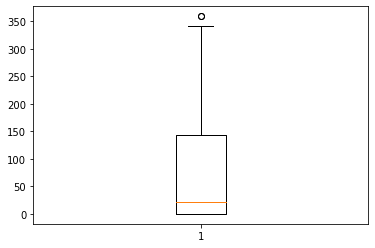

In [38]:
plt.boxplot(concrete['slag'])

#### 1.10 모든 특성에 대해 이상치 확인하기

In [39]:
import seaborn as sns

 - seaborn 의 boxplot 이용

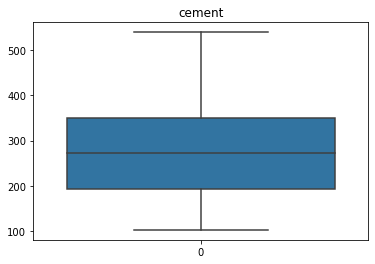

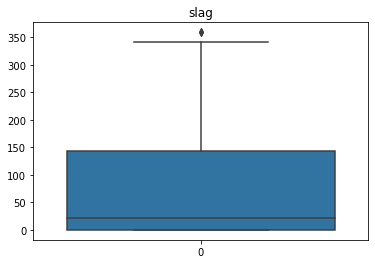

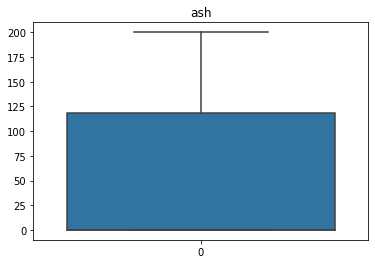

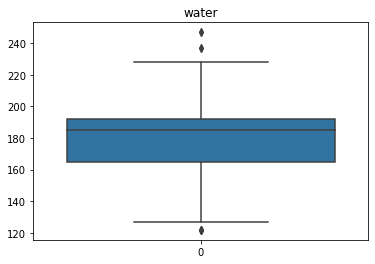

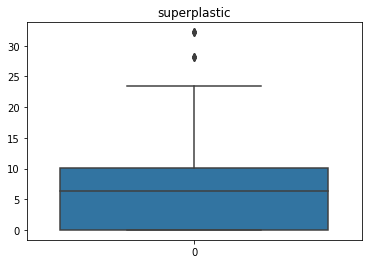

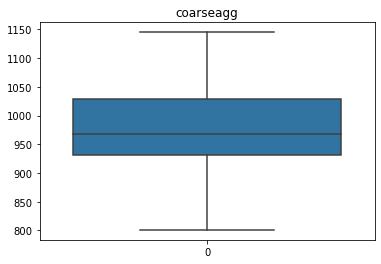

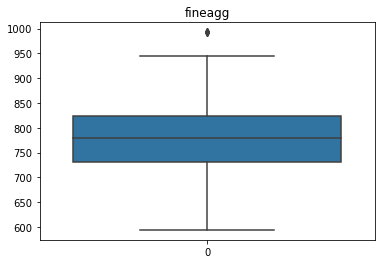

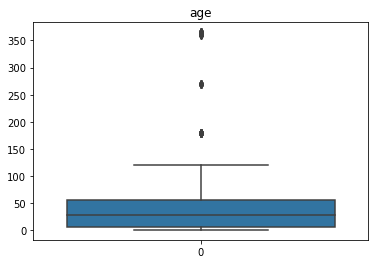

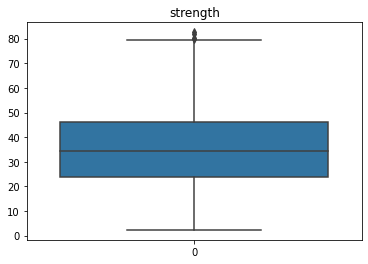

In [40]:
for column in concrete.columns:
  plt.figure()
  sns.boxplot(data=concrete[column])
  plt.title("{}".format(column))

* 𝑄1−(1.5×𝐼𝑄𝑅)보다 작거나  𝑄3+(1.5×𝐼𝑄𝑅)보다 큰 값은 이상치로 간주
* 불리안 색인 사용 가능

### 2. 데이터 전처리 

#### 2.1 slag 특성에 대해서만 이상치를 적당한값(q3)으로 바꿔보기

In [41]:
# pandas에서 제공하는 quantile()을 활용하여
# q1과 q3값을 구한다
q1 = concrete['slag'].quantile(q=0.25)
q3 = concrete['slag'].quantile(q=0.75)
IQR = q3 - q1 # 사분위 수 범위

cond = (concrete['slag'] < (q1 -  1.5*IQR)) | (concrete['slag'] > (q3 + 1.5*IQR))

In [42]:
concrete[cond]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
553,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.422359
559,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.435269


In [43]:
## 값 치환하기 
concrete.loc[cond, 'slag'] = q3

In [44]:
concrete[cond]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
553,239.6,142.95,0.0,185.7,0.0,941.6,664.3,7,25.422359
559,239.6,142.95,0.0,185.7,0.0,941.6,664.3,28,39.435269


In [45]:
# 모든 컬럼에 대해 이상치 불리언 색인

for column in concrete.columns :
    q1 = concrete[column].quantile(q=0.25)
    q3 = concrete[column].quantile(q=0.75)
    IQR = q3 - q1 # 사분위 수 범위
    
    cond = (concrete[column] < (q1 -  1.5*IQR)) | (concrete[column] > (q3 + 1.5*IQR))
    
    print("Column Name : ", column)
    print("Number of outlier : ", len(concrete[cond]))

Column Name :  cement
Number of outlier :  0
Column Name :  slag
Number of outlier :  0
Column Name :  ash
Number of outlier :  0
Column Name :  water
Number of outlier :  9
Column Name :  superplastic
Number of outlier :  10
Column Name :  coarseagg
Number of outlier :  0
Column Name :  fineagg
Number of outlier :  5
Column Name :  age
Number of outlier :  59
Column Name :  strength
Number of outlier :  4


#### 2.2 중복 데이터 확인하고 삭제하기

In [46]:
concrete.duplicated().sum()

25

In [47]:
concrete.drop_duplicates(inplace = True)

In [49]:
concrete.duplicated().sum()

0